In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter
import os

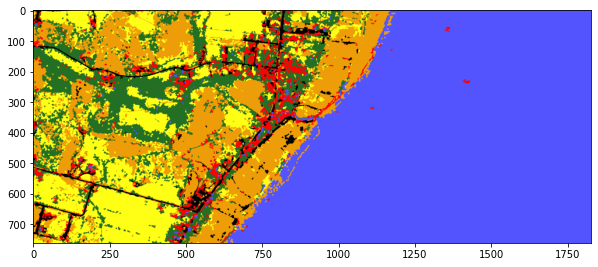

In [ ]:
pic=cv2.imread('/content/2015png.png')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(pic)

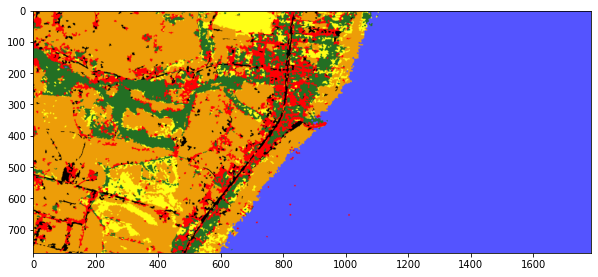

In [ ]:
image = cv2.imread('/content/2018png.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
print('Type of the image : ',type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Hight of the image {}'.format(pic.shape[0]))
print('Width of the image {}'.format(pic.shape[1]))
print('Dimension of the Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (761, 1827, 4)
Hight of the image 761
Width of the image 1827
Dimension of the Image 3


In [ ]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 5561388
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [ ]:
print('Value of only R channel {}'.format(pic[ 150, 100, 0]))
print('Value of only G channel {}'.format(pic[ 150, 100, 1]))
print('Value of only B channel {}'.format(pic[ 150, 100, 2]))

Value of only R channel 35
Value of only G channel 111
Value of only B channel 35


In [ ]:
print("The type of image is {}".format(type(image)))
print("Shape of the image: {}".format(image.shape))

The type of image is <class 'numpy.ndarray'>
Shape of the image: (775, 1785, 3)


In [ ]:
def RGB_HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_colors(image, number_of_colors, show_chart):
  reshaped_image = cv2.resize(image, (800, 1700))
  reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(reshaped_image)
  counts = Counter(labels)
  counts = dict(sorted(counts.items()))
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]
  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,startangle=90, autopct='%.0f%%')
  return rgb_colors

[array([ 84.12509121,  84.03164472, 254.69238501]),
 array([253.38974156, 252.49268499,  21.85163538]),
 array([243.5621511 ,   7.69323492,   6.05483191]),
 array([ 44.50821952, 112.05171736,  33.85333043]),
 array([9.3984848 , 3.99969574, 0.98095354]),
 array([232.16083899, 157.53954723,   9.40226584])]

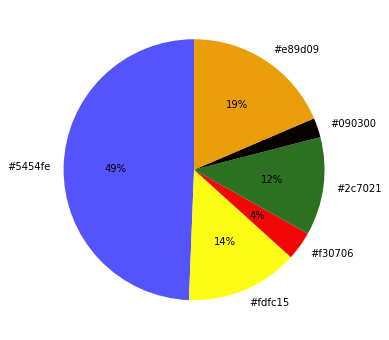

In [ ]:
#2015
get_colors(pic, 6, True)

[array([235.38975887, 156.03008827,   8.43358146]),
 array([ 84.059938  ,  84.02031291, 254.88543337]),
 array([14.97074629,  4.09514078,  0.50730397]),
 array([246.69670776,   7.90004317,   4.9227635 ]),
 array([ 45.01920628, 109.59771097,  33.20467036]),
 array([252.55171709, 250.24399333,  21.63868797])]

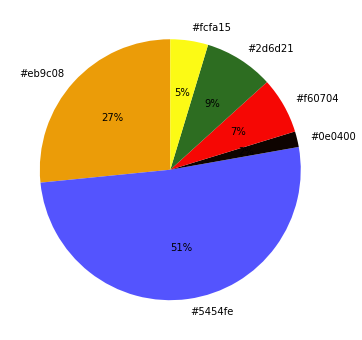

In [ ]:
#2018
get_colors(image, 6, True)